# The Price is Wrong?

One introductory macroeconomic Model presented in most Macroeconomics courses discusses an important model, known as the AS-AD Model, or Aggregate Demand-Aggregate Supply Model. Similar to the concept of supply and demand in Microeconomics, the AS-AD model tries to consider these relationships between suppliers and consumers, which respond to price in producing or consuming some output.  Unlike the microeconomic model, the AS-AD model tried to consider all markets in aggregate, rather any particular market for bread, oil, labor or credit.  
  
A key characteristic of the 1987 crash was the range of global macroeconomic factors which triggered, changes in inflation and monetary policy.  In the first note-pack of this module, we outlined the events surrounding OPEC oil embargo, neoliberalization and changing banking legislation. Beyond this is freeing up the monopoly and monopsony markets, characterized particularly in the UK by large state industries, increasing prices of raw material prices, and changes in money supply – a canonical example of Cost-Push Inflation, which we will explore both graphically and through data.

The AS-AD model iutilizes two important equations representing Aggregate Demand and Aggregate Supply, shown below:    

__Aggregate Demand__
$$ Y = Y^{d}(\frac{M}{P}, G, T, Z_{1}) $$
  
where $Y$ represents real GDP or real output, $Y^{d}$ represents our function for aggregate demand as a function of $\frac{M}{P}$, where $M$ represents money supply and $P$ represents price-level - which can be thought of as a measure of purchasing powe r- $G$ represents government spending, $T$ represents real taxes and $Z_{1}$ represents a range of exogenous factors from natural disasters to political events and changes in market structure.  
  
__Aggregate Supply__
$$ Y = Y^{s}(\frac{W}{P}, \frac{P}{P^{e}}, Z_{2}) $$  
    
where $Y$ represents real GDP or real output, $Y^{s}$ is some function for aggregate supply, as a function of $\frac{W}{P}$, representing nominal wages over price-level- or real wages, $\frac{P}{P^{e}}$, which aims to account for changes in the anticipated (expected) price level by suppliers and $Z_{2}$, which is a vector of exogenous variables which can represent levels of technology, capital stock or elements of labor demand.  

Below are a set of interactive graphs, which you can use to visualize changes in $Z_{1}$ and $Z_{2}$ on Aggregate Supply (AS) and Aggregate Demand (AD).  These graphs, represent short-run AS and AD, as in the long-run, the AS-AD model treats AS as perfectly inelastic in the long-run - i.e., a vertical line.  Using the sliders, you can begin to understand the effects of various inputs of these graphs.  
  
Again, we will be using a number of of libraries introduced in the previous Module, such as NumPy, SciPy, HoloViews and Pandas. It is important that you follow the code through this assigment for the peer review at the end of the module. You are encourages to make changes to explore characteristics on their own.  

In [1]:
import numpy as np
from scipy.optimize import fsolve
from scipy.stats import iqr
import pandas as pd

import holoviews as hv
import hvplot.pandas

In [2]:
# There is a compatilibility issue with this library \
#and newer versions of Pandas, this is short fix to the problem, \
#if you have issues at this chunk comment it out and you should be fine.  
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.wb as wb

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
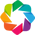

In [3]:
hv.extension('bokeh')
np.random.seed(42)

In [4]:
def P(*args, **kwargs):
    P = np.linspace(-10, 10, 100).reshape(-1,1)
    P = P[P!=0]
    return P

def AS(P=P(), W=0, P_e=1, Z_2=0):
    return P-Z_2

def AD(P=P(), M=0, G=0, T=0, Z_1=0):
    return -P+Z_1

In [5]:
def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x : fun1(x) - fun2(x),x0)

In [6]:
def curves(z_2=0, z_1=0):
    as_eq = pd.DataFrame([P(), AS(P=P(), Z_2=0)], index=['Price-Level','Real Output']).T
    ad_eq = pd.DataFrame([P(), AD(P=P(), Z_1=0)], index=['Price-Level','Real Output']).T
    
    as_shock = pd.DataFrame([P(), AS(P=P(), Z_2=z_2+10)], index=['Price-Level','Real Output']).T
    ad_shock = pd.DataFrame([P(), AD(P=P(), Z_1=z_1+10)], index=['Price-Level','Real Output']).T
    
    result = findIntersection(lambda x: AS(P=x, Z_2=z_2+10), lambda x: AD(P=x, Z_1=-z_1-10), 0.0)
    r = result + 1e-4 if result==0 else result
    
    plot = hv.Curve(as_eq, vdims='Price-Level',kdims='Real Output').options(alpha=0.2, color='#1BB3F5') *\
                              hv.Curve(ad_eq, vdims='Price-Level',kdims='Real Output').options(alpha=0.2, color='orange') *\
                              hv.Curve(as_shock, vdims='Price-Level',kdims='Real Output', label='AS').options(alpha=1, color='#1BB3F5') *\
                              hv.Curve(ad_shock, vdims='Price-Level',kdims='Real Output', label='AD').options(alpha=1, color='orange') *\
                              hv.VLine(-result[0]).options(color='black', alpha=0.2, line_width=1) *\
                              hv.HLine(AD(P=-r[0], Z_1=z_1+10)).options(color='black', alpha=0.2, line_width=1)
                              
    return plot.options(xticks=[0], yticks=[0], title_format="Short-Run AS-AD Model")

In [9]:
%output

%output max_frames=500 charwidth=80 info=False filename=None

For help with the %output magic, call %output?


In [10]:
%%opts Curve [width=800, height=400] 
%%output filename="penguin_plot"

hv.DynamicMap(curves, kdims=['z_2', 'z_1'], label="Short-Run AS-AD Model")\
.redim.range(z_2=(-10,10), z_1=(-10,10))

:DynamicMap   [z_2,z_1]
   :Overlay
      .Curve.I  :Curve   [Real Output]   (Price-Level)
      .Curve.II :Curve   [Real Output]   (Price-Level)
      .Curve.AS :Curve   [Real Output]   (Price-Level)
      .Curve.AD :Curve   [Real Output]   (Price-Level)
      .VLine.I  :VLine   [x,y]
      .HLine.I  :HLine   [x,y]

In order to better understand the Crash of '87, lets now apply our understanding of the AS-AD macroeconomic model to model and predict the effects of global macroeconomic changes on the economy and financial markets.  

Before the 1974–1975 recession, there was a particularly sharp rise in the price of energy on world markets, caused by a restriction of oil output by the OPEC - as previously discussed in this module. According to the AS-AD Model, increases in the price of energy services as an exogenous factor, causing a leftward shift to our Aggregate Supply curve.  Typically, these $Z_{i}$ exogenous factors are referred to as exogenous shocks, as they are exogenous to our primary model and serve to disrupt the existing equilibrium in the short-run.  This leftward shift takes place as producers respond to the increasing price of raw materials.  If we imagine these producers as consumers of oil- through trucks, deliveries and energy production- the downward nature of their demand curve suggests that increases in price reduce their demand for a good.  Additionally, we can imagine that prices are slow to respond as producers can't change prices immediately. Consumers are resistant to increases in prices and so if producers increase their prices they may lose business, to competitors. This increase in the price of raw materials decreases their profits, reducing the incentives to invest and produce on aggregate.  These serve to shift AS to the left.  Using the z_2 slider, you can visualize this shift in the plots above, observing the new price-level and output equilibrium. 

With the 1974–1975 recession, the economy also observed a number of secondary effects.  Secondary effects are often effects which take place at some lag to primary effects and are often caused by the initial shock and elements of the primary effect.  These secondary effects included a reduction in measured productivity (Real Output), a fall in employment (as producers respond to increasing input prices), and a decrease in consumption (as fewer people have jobs and goods are more expensive) and investment expenditures (as consumers have less money after basic expenditure to save), are all consistent with this recession having been caused by the increase in the price of energy.  These can be view as a smaller leftward shift in the AD curve but are predominantly captured by the movement of the AS curve along the AD curve.  

Typically, Reserve Banks respond to such supply-side shocks by increasing the money supply, lowering interest rates, restoring real output, real income, and employment levels.  This is done by decreasing interesting rates and encouraging borrowing on the part of consumers.  This served to further increase the price-level under the AS-AD model, causing inflation, but restoring Real GDP.  You can observe this effect using the z_1 slider, which should allow you to observe an increase in Price-level and increase in Real Output on the graph. This process of a leftward shift in the AS curve and rightward shift in AD curve is typically referred to as a Cost-Push Inflation and is commonly observed in markets around the world today.   

Although the recession of 1981-82 was preceded by an increase in the price of energy, evidence suggests that monetary policy was the primary cause. For this second recession, the energy price increase happened too soon before the recession to have been its principal cause. The major criticism of Monetarist Policy at the time was that it focused primarily on managing inflation as opposed to targeting real output and real income. Inflation had become relatively high in the 1970s in the United States, and by the early 1980s the Federal Reserve System (the Fed), took dramatic steps to reduce inflation by restricting growth in the supply of money and driving up interest rates. The idea is that by increasing interest rates you incentivize consumers to save thus limiting the flow of money in the economy. This is known as the money multiplier effect within the Keynsian Cross Macroeconomic  Model.  
  
In the next set of notes we will be analyzing the data at the time of the crash in order to determine the realibility of our the AS-AD Model, and whether other data or other mdoels could be incorperated and used to better forecast and understand the evolving risk landscape.  

# References
Parkin, M., Rhodes, B., Saayman, A., Schoer, V., Scholt, F. & Thompson, K. 2010. Economics: Global and Southern African Perspectives. First ed. Peason.  
  
Richard Roll, “The International Crash of October 1987,”  Financial Analysts Journal,  September–October 1988.  